**Objective**: The aim of this project is to determine if a website is legitimate or not using machine learning models.

**Analysis**: Data analysis involves the following steps.
1. Data Preparation.
2. Exploratory data analysis.
3. Feature selection.
4. Model building.
5. Model deployment.

In [35]:
# Load the following libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle
import re
import random
import socket
from urllib.parse import urlparse
from flask import Flask, jsonify, request, Response, render_template

In [36]:
# Python logging.

import logging

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

formatter = logging.Formatter('%(asctime)s:%(name)s:%(message)s')

file_handler = logging.FileHandler('model.log')
file_handler.setLevel(logging.DEBUG)
file_handler.setFormatter(formatter)

stream_handler = logging.StreamHandler()
stream_handler.setFormatter(formatter)

logger.addHandler(file_handler)

In [37]:
# Load the data.

data = pd.read_csv("/kaggle/input/full-data/dataset_full.csv")

In [38]:
# View the data.

data

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [39]:
# Examine given data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [40]:
# Check the statistics of data.

data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


In [41]:
# Check if the data has any missing values.

missing_val = [features for features in data.columns if data[features].isnull().sum() > 0]

missing_val

# There are no missing values.

[]

In [42]:
# Check the numerical features of data.

num_features = [feature for feature in data.columns if data[feature].dtype != 'O']

num_features

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'qty_vowels_domain',
 'domain_length',
 'domain_in_ip',
 'server_client_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_dir

In [43]:
# Check if there are any categorical features in the data.

cat_features = [features for features in data.columns if data[features].dtype=='O']

cat_features

# There are no categorical features in the data.

[]

## Data Preprocessing

In [44]:
# Separate dependent and independent variables.

X = data.iloc[:,:-1]

y = data.iloc[:,-1]

In [45]:
# Getting only first 5 columns to check for outliers.

first_5_columns = X.iloc[:, :5]

first_5_columns

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url
0,3,0,0,1,0
1,5,0,1,3,0
2,2,0,0,1,0
3,4,0,2,5,0
4,2,0,0,0,0
...,...,...,...,...,...
88642,3,1,0,0,0
88643,2,0,0,0,0
88644,2,1,0,5,0
88645,2,0,0,1,0


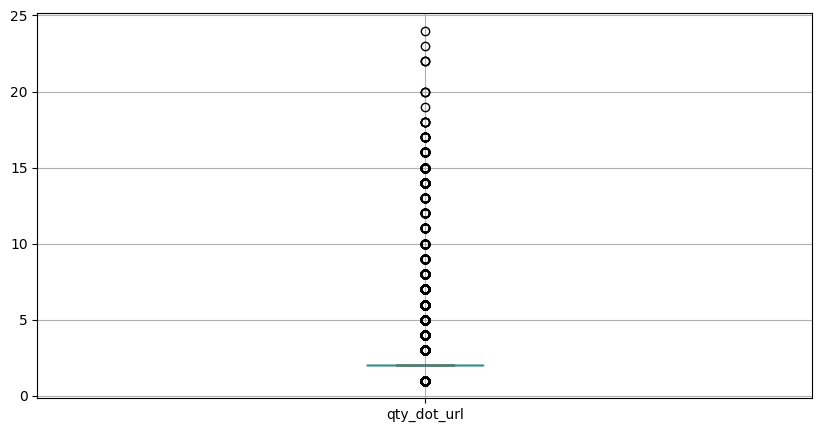

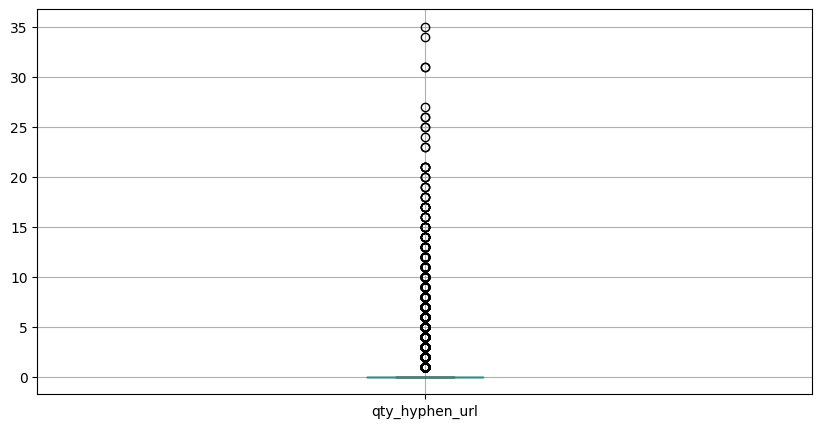

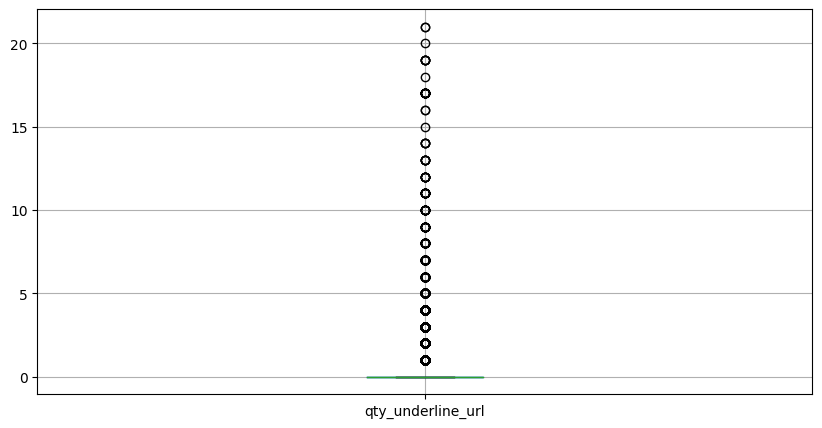

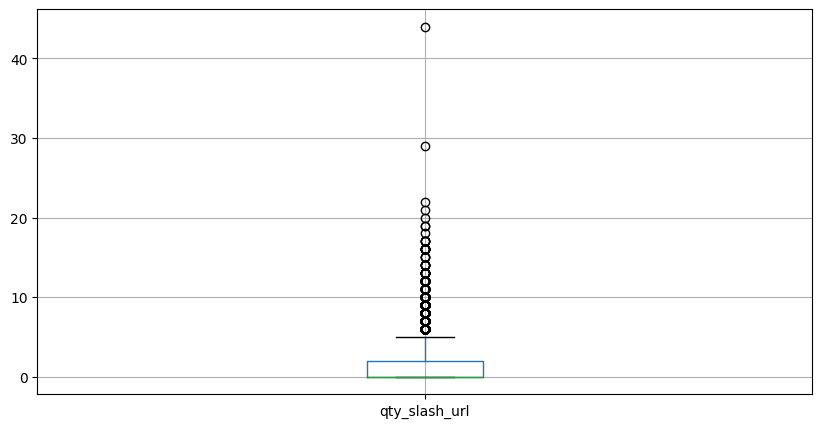

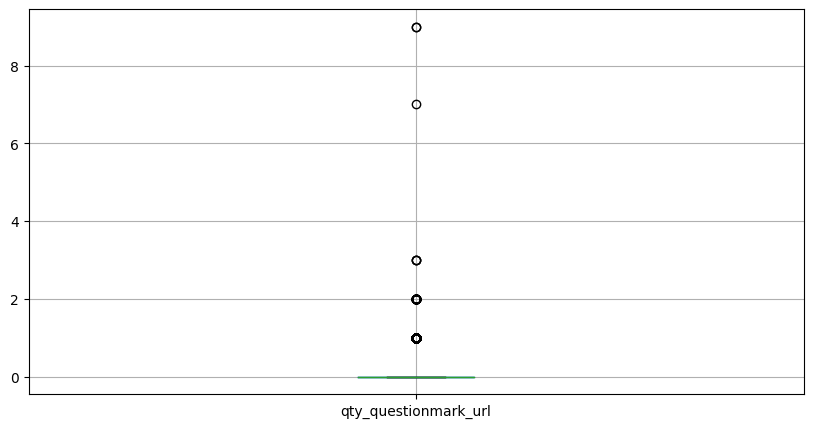

In [46]:
# Plotting boxplots for some continous variables in order to detect outliers.

for column in first_5_columns:
    plt.figure(figsize = (10,5))
    first_5_columns.boxplot([column])
    
# There are outliers in data.

In [47]:
# Flooring and capping ouliers.

for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1 
    Lower_cap  = Q1 - 1.5*IQR
    Upper_cap = Q3 + 1.5*IQR
    X[col][X[col] <= Lower_cap] = Lower_cap
    X[col][X[col] >= Upper_cap] = Upper_cap

/tmp/ipykernel_32/3099811084.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col][X[col] <= Lower_cap] = Lower_cap
/tmp/ipykernel_32/3099811084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col][X[col] >= Upper_cap] = Upper_cap
/tmp/ipykernel_32/3099811084.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col][X[col] <= Lower_cap] = Lower_cap
/tmp/ipykernel_32/3099811084.py:10: SettingWithCopyWarning: 
A value is try

In [48]:
# Getting only first 5 columns to check for outliers.

first_5_columns = X.iloc[:, :5]

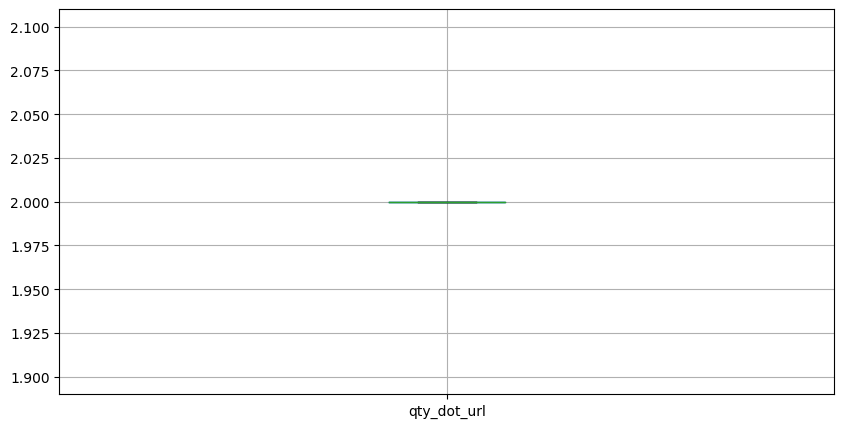

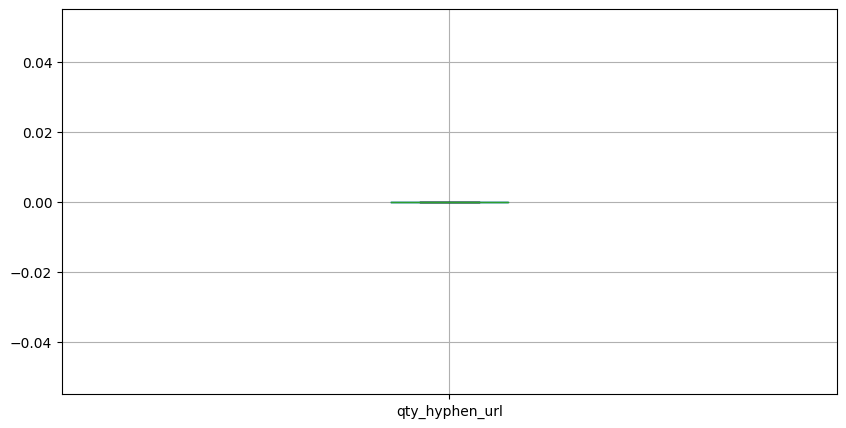

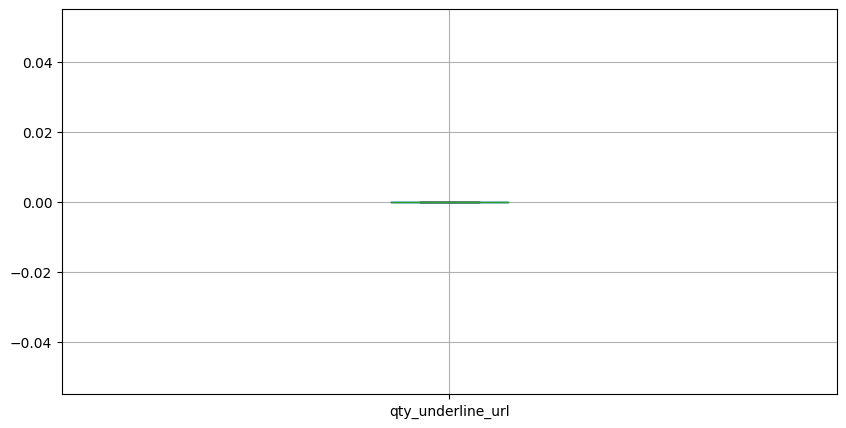

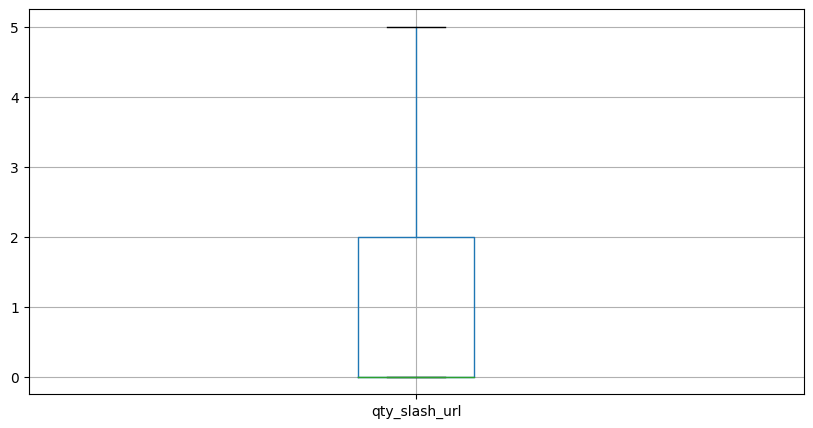

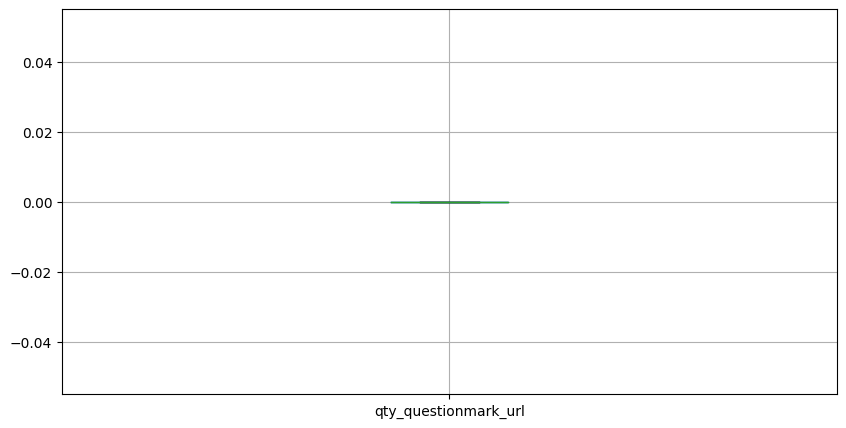

In [49]:
# Plotting boxplots for all continous variables in order to detect outliers.

for column in first_5_columns:
    plt.figure(figsize = (10,5))
    first_5_columns.boxplot([column])
    
# Outliers have been floored and capped now.

In [50]:
# Scaling the numeric columns before building the model.

scaler = MinMaxScaler()

# Transform data.

scaled = scaler.fit_transform(X)

print(scaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [51]:
# Converting to dataframe.

scaled_df = pd.DataFrame(scaled, columns = X.columns)

scaled_df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.285714,0.000000,0.033625,0.0,0.285714,0.0,0.0,0.0
1,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.170141,0.0,0.285714,0.285714,0.359251,1.0,0.285714,0.0,0.0,0.0
2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.285714,0.857143,0.022216,1.0,0.285714,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.285714,0.000000,0.011032,1.0,0.285714,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.345915,0.0,0.285714,0.285714,0.135477,0.0,0.571429,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.377465,0.0,0.428571,0.285714,0.135477,0.0,0.285714,0.0,0.0,0.0
88643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.486761,0.0,0.285714,0.571429,0.022291,0.0,0.857143,0.0,0.0,0.0
88644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.803380,0.0,0.285714,1.000000,0.541908,1.0,0.285714,0.0,0.0,0.0
88645,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.142857,0.285714,0.001996,1.0,0.285714,0.0,0.0,0.0


### **Exploratory Data Analysis**

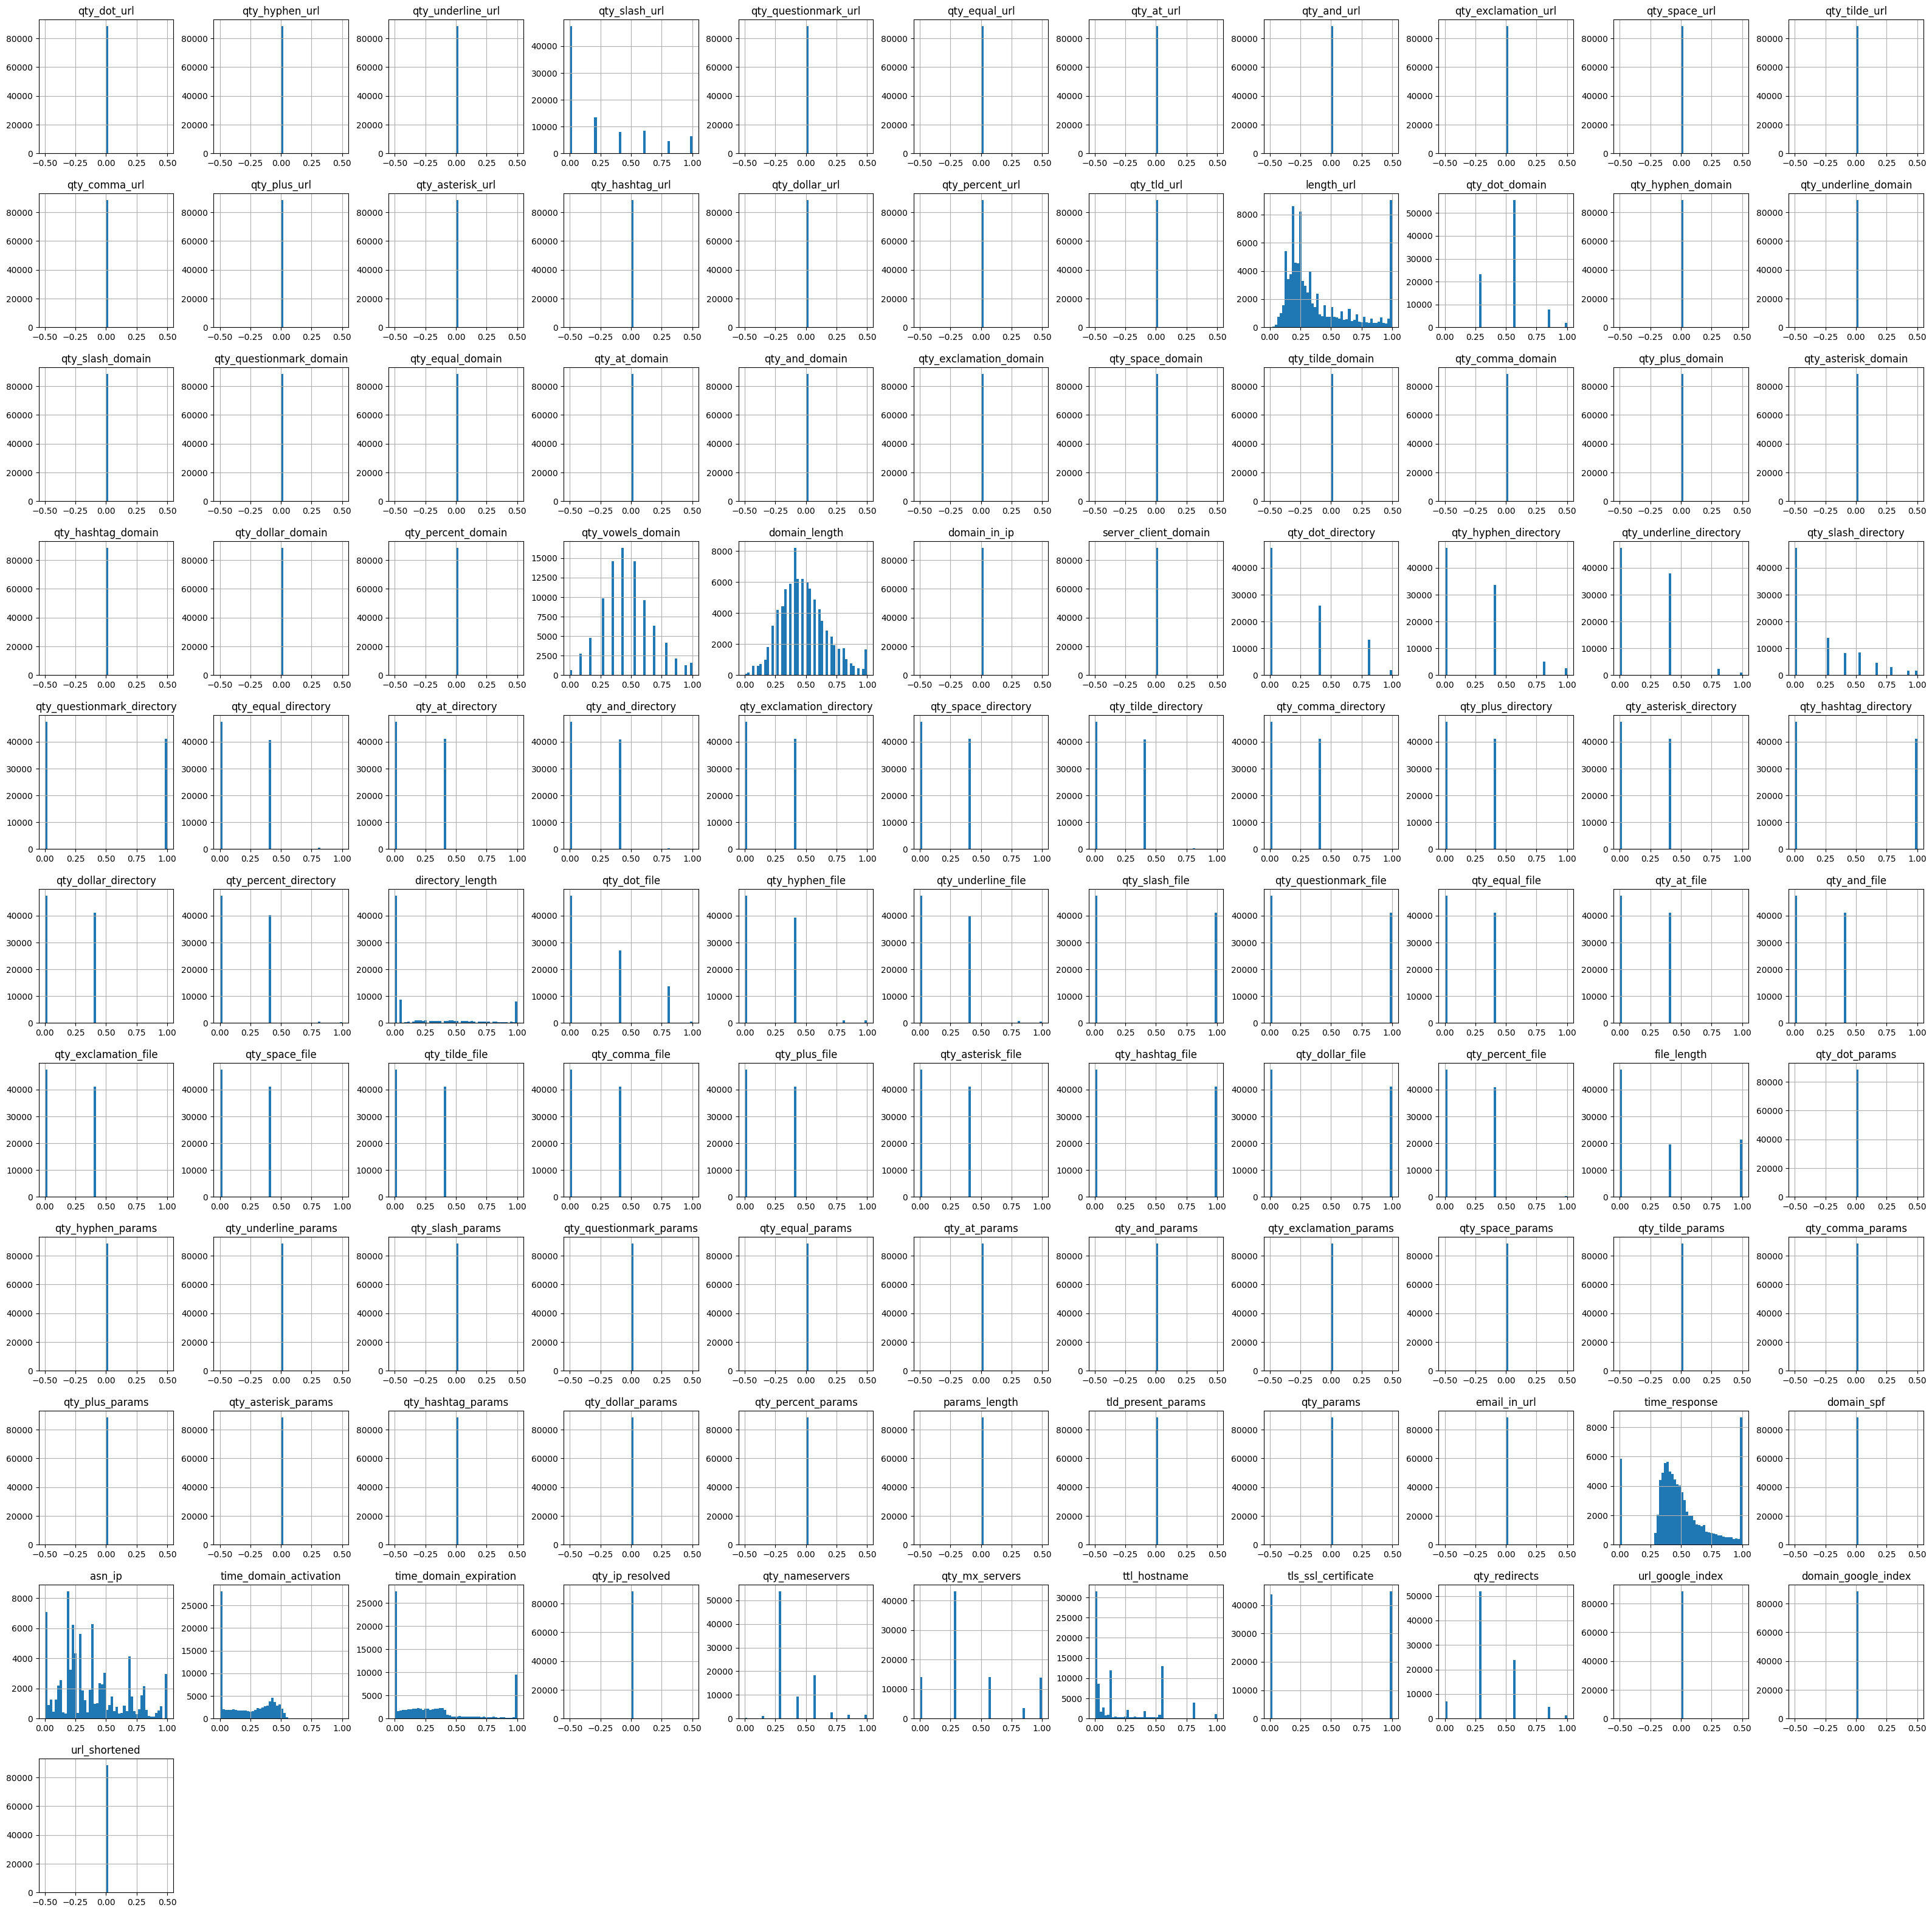

In [52]:
# Plotting the data distribution.

scaled_df.hist(bins = 50,figsize = (40, 40))

plt.show()

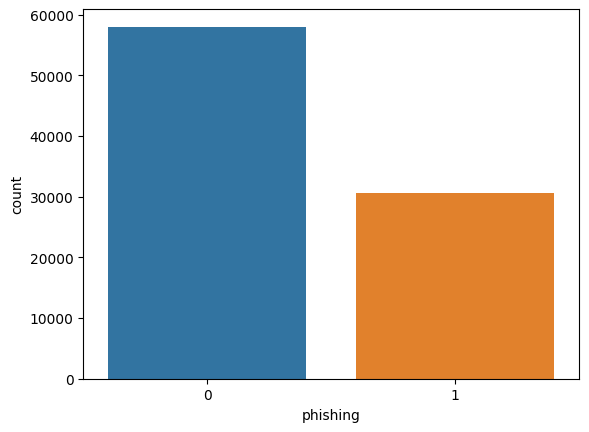

In [53]:
# Check the distribution of two classes in taget variable.

sns.countplot(x ='phishing', data = data)

plt.show()

In [54]:
# Check the class distribution.

counter = Counter(data['phishing'])

print(counter)

# There is a class imbalance. Hence in the next step, we will use SMOTE to balance the data.

Counter({0: 58000, 1: 30647})


In [55]:
# Applying SMOTE to deal with class imbalance.

oversample = SMOTE(random_state = 100)

X, y = oversample.fit_resample(scaled_df, y)

In [56]:
# Check class distribution after applying SMOTE.

counter = Counter(y)

print(counter)

# Both classes are now balanced.

Counter({1: 58000, 0: 58000})


### **Creating Train and Test data**

In [57]:
# Split the data into train and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size = 0.30)

print(X_train.shape)

print(y_train.shape)

print(X_test.shape)

print(y_test.shape)

(81200, 111)
(81200,)
(34800, 111)
(34800,)


## **Feature Selection**

In [58]:
# Using ExtraTreesClassifier to identify important features.

estimator = ExtraTreesClassifier(random_state = 100, n_estimators = 50)

selector = SelectFromModel(estimator)

selector = selector.fit(X_train, y_train) 

In [59]:
# Extract important features.

features = np.array(X_train.columns)

status = selector.get_support()

print("Selected features:".format(len(X_train.columns)))

print(features[status])

Selected features:
['qty_slash_url' 'length_url' 'qty_dot_domain' 'qty_vowels_domain'
 'domain_length' 'qty_dot_directory' 'qty_slash_directory'
 'qty_questionmark_directory' 'qty_and_directory'
 'qty_exclamation_directory' 'qty_tilde_directory' 'qty_comma_directory'
 'qty_plus_directory' 'qty_asterisk_directory' 'qty_hashtag_directory'
 'qty_dollar_directory' 'directory_length' 'qty_dot_file'
 'qty_hyphen_file' 'qty_underline_file' 'qty_slash_file'
 'qty_questionmark_file' 'qty_equal_file' 'qty_and_file'
 'qty_exclamation_file' 'qty_comma_file' 'qty_plus_file'
 'qty_asterisk_file' 'qty_hashtag_file' 'qty_dollar_file'
 'qty_percent_file' 'file_length' 'time_response' 'asn_ip'
 'time_domain_activation' 'time_domain_expiration' 'qty_nameservers'
 'qty_mx_servers' 'ttl_hostname' 'qty_redirects']


In [60]:
# Extract important features from train and test data.

X_train = X_train[features[status]]

X_test = X_test[features[status]]

print(len(X_train.columns),"features selected.")

# Out of 111 features, 40 features were extracted as important features by ExtraTreesClassifier.
# Model building will be done only on the selected 40 features.

40 features selected.


## **Model Building**

In [61]:
# Function to predict target values.

def model_pred(model,y_test):
    print()
    y_pred = model.predict(X_test)

In [62]:
# Function to generate confusion matrix, classification report and ROC curve.

def model_report(model):
    print(confusion_matrix(y_test, y_pred))
    print()
    print(classification_report(y_test, y_pred))
    print()
    print('roc_auc_score: ', roc_auc_score(y_test, y_pred))
    print()
    print("Accuracy score :", accuracy_score(y_test, y_pred))
    print()
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average = 'binary')
    print('Precision: ', precision)
    print()
    print('Recall: ', recall)
    print()
    print('f1-score: ', f1_score)
    
    # calculate the fpr and tpr for all thresholds of the classification.
    
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### **Logistic Regression**

In [63]:
# Building Logistic Regression model.

lr_model = LogisticRegression(random_state = 100)

lr_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [64]:
# Making predictions on test data.

y_pred = lr_model.predict(X_test)


[[15784  1580]
 [  968 16468]]

              precision    recall  f1-score   support

           0       0.94      0.91      0.93     17364
           1       0.91      0.94      0.93     17436

    accuracy                           0.93     34800
   macro avg       0.93      0.93      0.93     34800
weighted avg       0.93      0.93      0.93     34800


roc_auc_score:  0.9267449103626761

Accuracy score : 0.9267816091954023

Precision:  0.9124556737588653

Recall:  0.94448267951365

f1-score:  0.9281929883891332


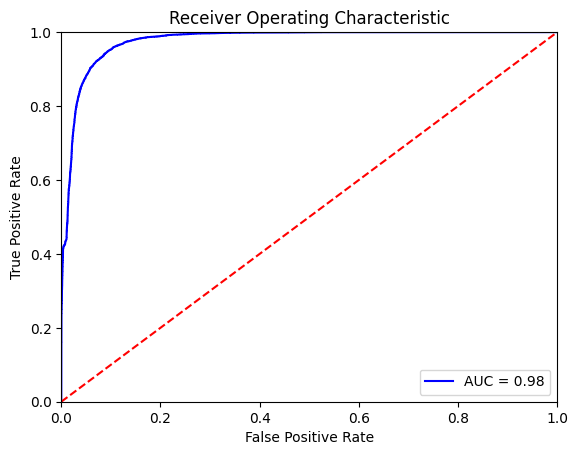

In [65]:
# Examine predictions made by the model on the test data.

model_pred(lr_model, y_test)

model_report(lr_model)

### **Decision Tree Classifier**

In [66]:
# Building Decision Tree Classifier.

dt_model = DecisionTreeClassifier(random_state = 100)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [67]:
# Making predictions on test data.

y_pred = dt_model.predict(X_test)


[[16686   678]
 [  710 16726]]

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17364
           1       0.96      0.96      0.96     17436

    accuracy                           0.96     34800
   macro avg       0.96      0.96      0.96     34800
weighted avg       0.96      0.96      0.96     34800


roc_auc_score:  0.9601166743004688

Accuracy score : 0.9601149425287356

Precision:  0.9610434382900482

Recall:  0.9592796512961689

f1-score:  0.9601607347876004


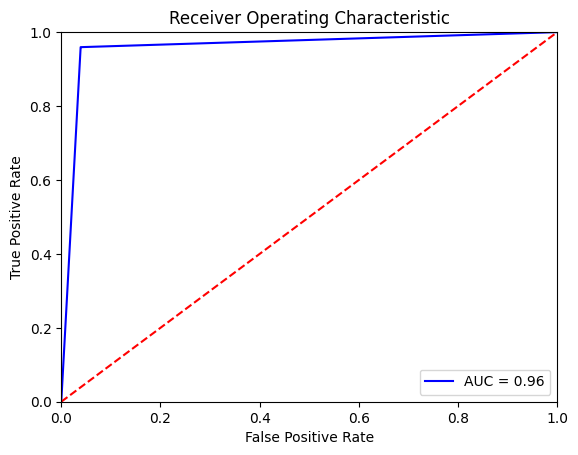

In [68]:
# Examine predictions made by the model on the test data.

model_pred(dt_model, y_test)

model_report(dt_model)

### **Random Forest Classifier**

In [69]:
# Building Random Forest Classifier.

rf_model = RandomForestClassifier(random_state = 100, n_estimators = 10)

rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=100)

In [70]:
# Making predictions on test data.

y_pred = rf_model.predict(X_test)


[[16865   499]
 [  487 16949]]

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17364
           1       0.97      0.97      0.97     17436

    accuracy                           0.97     34800
   macro avg       0.97      0.97      0.97     34800
weighted avg       0.97      0.97      0.97     34800


roc_auc_score:  0.9716658319425227

Accuracy score : 0.9716666666666667

Precision:  0.9714007336084365

Recall:  0.9720692819454003

f1-score:  0.9717348927875242


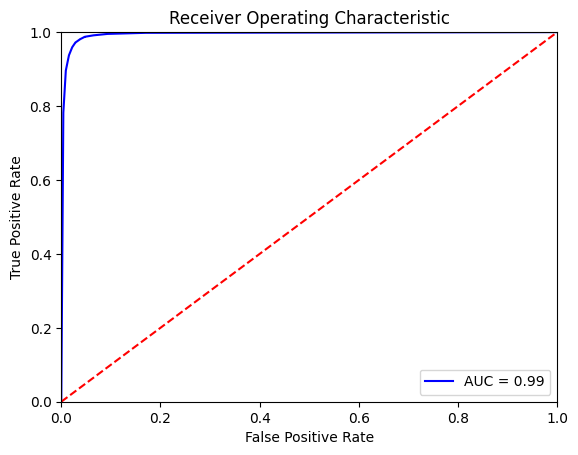

In [71]:
# Examine predictions made by the model on the test data.

model_pred(rf_model,y_test)

model_report(rf_model)

### **K-Nearest Neighbor (K-NN) Classifier**

In [72]:
# Building a K-NN model.

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [73]:
# Making predictions on test data.

y_pred = knn_clf.predict(X_test)


[[16504   860]
 [  485 16951]]

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     17364
           1       0.95      0.97      0.96     17436

    accuracy                           0.96     34800
   macro avg       0.96      0.96      0.96     34800
weighted avg       0.96      0.96      0.96     34800


roc_auc_score:  0.9613281142860224

Accuracy score : 0.9613505747126436

Precision:  0.9517152321599012

Recall:  0.9721839871530168

f1-score:  0.961840724033251


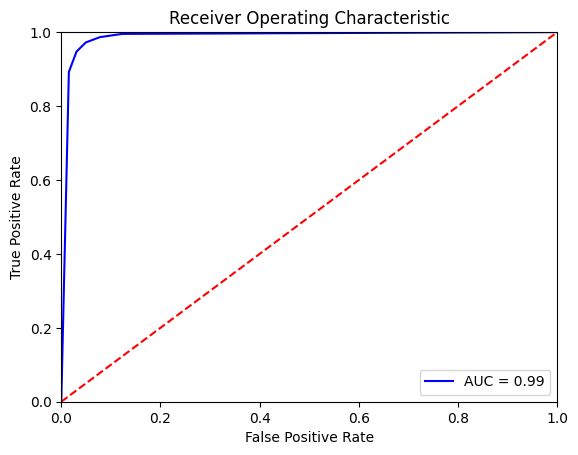

In [74]:
# Examine predictions made by the model on the test data.

model_pred(knn_clf,y_test)

model_report(knn_clf)

### **eXtreme Gradient Boosting (XGB) Classifier**

In [75]:
# Building XGB model.

xgb_model = XGBClassifier(random_state = 100, n_estimators = 10)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

In [76]:
# Making predictions on test data.

y_pred = xgb_model.predict(X_test)


[[16448   916]
 [  552 16884]]

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     17364
           1       0.95      0.97      0.96     17436

    accuracy                           0.96     34800
   macro avg       0.96      0.96      0.96     34800
weighted avg       0.96      0.96      0.96     34800


roc_auc_score:  0.9577942703837179

Accuracy score : 0.957816091954023

Precision:  0.9485393258426966

Recall:  0.9683413626978665

f1-score:  0.958338063344307


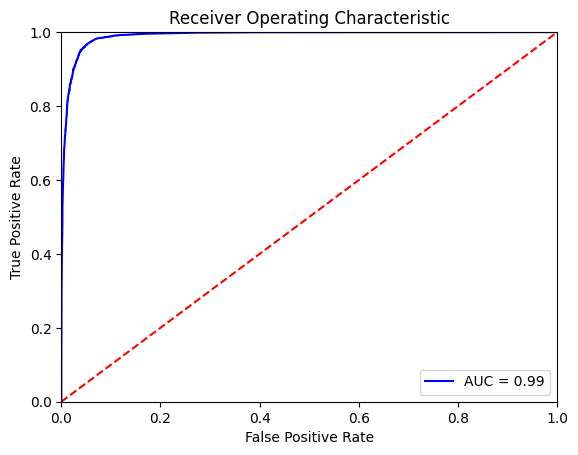

In [77]:
# Examine predictions made by the model on the test data.

model_pred(xgb_model,y_test)

model_report(xgb_model)

### **Naive Bayes Classifer**

In [78]:
# Building Naive Bayes Classifier.

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

In [79]:
# Making predictions on test data.

y_pred = nb_model.predict(X_test)


[[14028  3336]
 [  430 17006]]

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     17364
           1       0.84      0.98      0.90     17436

    accuracy                           0.89     34800
   macro avg       0.90      0.89      0.89     34800
weighted avg       0.90      0.89      0.89     34800


roc_auc_score:  0.8916083747009301

Accuracy score : 0.8917816091954023

Precision:  0.836004326024973

Recall:  0.9753383803624684

f1-score:  0.900312351103817


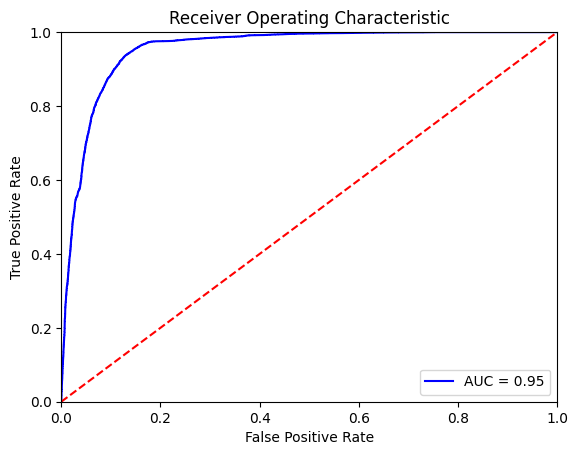

In [80]:
# Examine predictions made by the model on the test data.

model_pred(nb_model,y_test)

model_report(nb_model)

In [81]:
# Saving Random forest model for deployment.

with open("rf_pred", "wb") as f:
    pickle.dump(rf_model, f)

## **Results**:

The accuracy and F1-score of all the models are as given below.

| Model | Accuracy (%) | F1-Score |
|-------|--------------|----------|
| Logistic Regression | 92.67 | 0.9281 |
| Decision Trees | 96.01 | 0.9601 |
| Random Forests | 97.16 | 0.9717 |
| k-Nearest Neighbor | 96.13 | 0.9618 |
| eXtreme Gradtient Boosting | 95.78 | 0.9583 |
| Naive Bayes | 89.17 | 0.9003 |


## **Conclusion**:

Out of all models created, Random forest classifier performed best with an accuracy of 97.16% and F1-score of 0.9717. Hence Random forest classifier can be best utilized for phishing domain detection.


## **Model Deployment**

In [ ]:
# Code for phishing detection app.

app = Flask(__name__)

# read our pickle file and label our logisticmodel as model
phish_model_ls = pickle.load(open('rf_pred', 'rb'))

urlError = {
    "Please enter url field"
}


@app.route('/')
def home():
    return render_template('/kaggle/input/index-html/index.html')

@app.route('/predict',  methods=['POST'])
def predict():

    X_predict = []

    url = request.form.get("EnterYourSite")
    print(url, "0000000000000000000000")
    if url:
        X_predict.append(str(url))
        y_Predict = ''.join(phish_model_ls.predict(X_predict))
        print(y_Predict)
        if y_Predict == 'bad':
            result = "This is a Phishing Site"
        else:
            result = "This is not a Phishing Site"

        return render_template('/kaggle/input/index-html/index.html', prediction_text = result)

    elif not url:
        return Response(
            response=urlError,
            status=400
        )

if __name__ == '__main__':

    app.run()

### This app can be used to determine if a site is phishing site or not.